In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [2]:
folder = "./outputs/0obs-20x20map7k"
summary = pd.read_csv(folder+"/summary.csv")
summary["Rect_square_area"] = summary["Rect_square_len"]*summary["Rect_square_len"]
summary.head(1)

,Rect_square_len,k,Runtime,HL_expanded,HL_generated,LL_expanded,LL_generated,agents,solution_cost,idea_cost,algorithm,Rect_square_area
0,1,0,1,1,3,14,46,./agent/0obs-20x20map-2agents-1.agents,5,1,CBSH-CR,1


## Node expanded vs Rectangle Area vs K

### CBSH

Text(0.5,0.92,'CBSH')

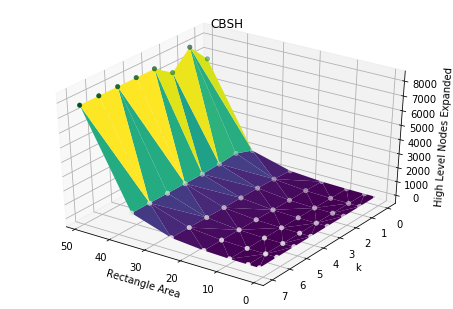

In [127]:

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(35, 125)

# X, Y value
groups = summary.groupby("algorithm")
CBSH_data = groups.get_group("CBSH")
CBSHCR_data = groups.get_group("CBSH-CR")
rc_area = CBSH_data["Rect_square_area"]
k = CBSH_data["k"]

node_expand = CBSH_data["HL_expanded"]
ax.set_xlabel('Rectangle Area')
ax.set_ylabel('k')
ax.set_zlabel('High Level Nodes Expanded');
ax.plot_trisurf(rc_area, k, node_expand, cmap='viridis', edgecolor='none');
ax.scatter3D(rc_area, k, node_expand,c=node_expand, cmap='Greens', linewidth=0.5);
plt.title("CBSH")


Text(0.5,0.92,'CBSH')

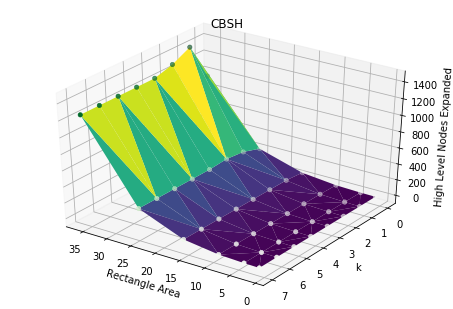

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(35, 125)

# X, Y value
groups = summary.loc[summary["Rect_square_area"]<40].groupby("algorithm")
CBSH_data = groups.get_group("CBSH")
CBSHCR_data = groups.get_group("CBSH-CR")
rc_area = CBSH_data["Rect_square_area"]
k = CBSH_data["k"]

node_expand = CBSH_data["HL_expanded"]
ax.set_xlabel('Rectangle Area')
ax.set_ylabel('k')
ax.set_zlabel('High Level Nodes Expanded');
ax.plot_trisurf(rc_area, k, node_expand, cmap='viridis', edgecolor='none');
ax.scatter3D(rc_area, k, node_expand,c=node_expand, cmap='Greens', linewidth=0.5);
plt.title("CBSH")

### CBSH-CR

Text(0.5,0.92,'CBSH-CR')

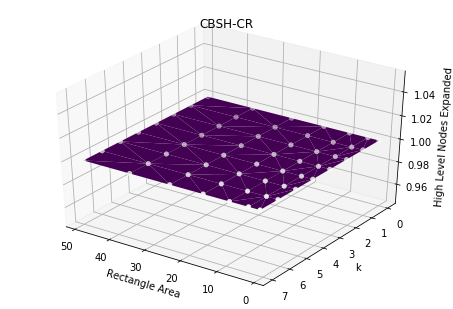

In [128]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(35, 125)

CBSHCR_data = groups.get_group("CBSH-CR")
rc_area = CBSHCR_data["Rect_square_area"]
k = CBSHCR_data["k"]
node_expand = CBSHCR_data["HL_expanded"]
ax.set_xlabel('Rectangle Area')
ax.set_ylabel('k')
ax.set_zlabel('High Level Nodes Expanded');

ax.plot_trisurf(rc_area, k, node_expand, cmap='viridis', edgecolor='none');
ax.scatter3D(rc_area, k, node_expand,c=node_expand, cmap='Greens', linewidth=0.5);
plt.title("CBSH-CR")


## High level nodes, low level nodes, runtime VS rectangle area, k

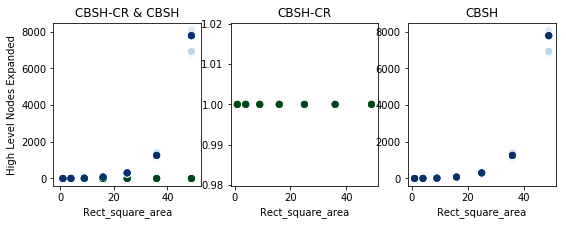

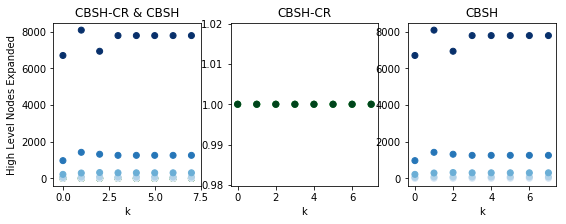

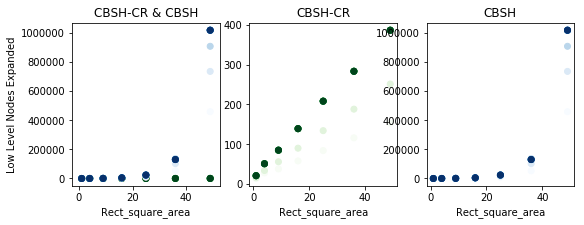

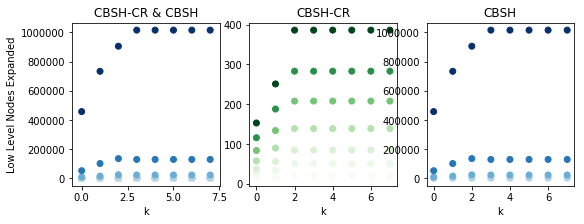

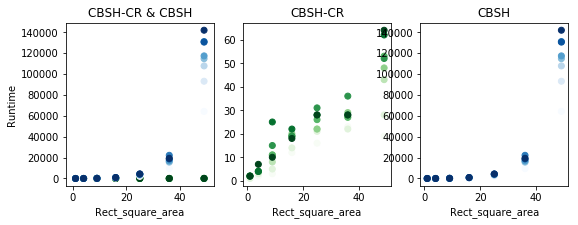

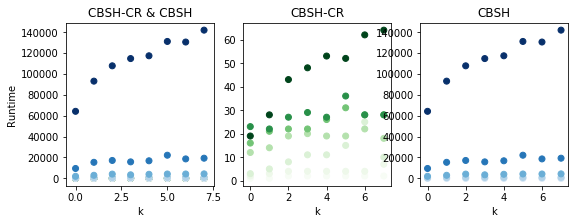

In [135]:
import seaborn as sns

def plot(xlabel,ylabel,x,y,cd,d1,d2,d1n,d2n):
    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y, c=cd,cmap='Greens', data=d1)
    plt.scatter(x, y, c=cd, cmap='Blues', data=d2)
    plt.title(d1n+" & "+d2n)
    plt.subplot(132)
    plt.xlabel(xlabel)
    plt.scatter(x, y, c=cd,cmap='Greens', data=d1)
    plt.title(d1n)
    plt.subplot(133)
    plt.xlabel(xlabel)
    plt.scatter(x, y, c=cd, cmap='Blues', data=d2)
    plt.title(d2n)
    plt.show()


plot("Rect_square_area","High Level Nodes Expanded",'Rect_square_area','HL_expanded',"k",CBSHCR_data,CBSH_data,"CBSH-CR","CBSH")
plot("k","High Level Nodes Expanded",'k','HL_expanded',"Rect_square_area",CBSHCR_data,CBSH_data,"CBSH-CR","CBSH")
plot("Rect_square_area","Low Level Nodes Expanded",'Rect_square_area','LL_expanded',"k",CBSHCR_data,CBSH_data,"CBSH-CR","CBSH")
plot("k","Low Level Nodes Expanded",'k','LL_expanded',"Rect_square_area",CBSHCR_data,CBSH_data,"CBSH-CR","CBSH")
plot("Rect_square_area","Runtime",'Rect_square_area','Runtime',"k",CBSHCR_data,CBSH_data,"CBSH-CR","CBSH")
plot("k","Runtime",'k','Runtime',"Rect_square_area",CBSHCR_data,CBSH_data,"CBSH-CR","CBSH")
       

## Next

CBSH-R
CBSH-RM